In [2]:
from scratch import *
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
folder = "datasets\\fashion_mnist_images"
folder

'datasets\\fashion_mnist_images'

In [4]:
label = os.listdir(os.path.join(folder, "train"))
label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
shirt = os.listdir(os.path.join(folder, "train", "0"))
shirt[0]

'0000.png'

In [6]:
image = cv2.imread(os.path.join(folder, "train", "0", "0000.png"), cv2.IMREAD_UNCHANGED)

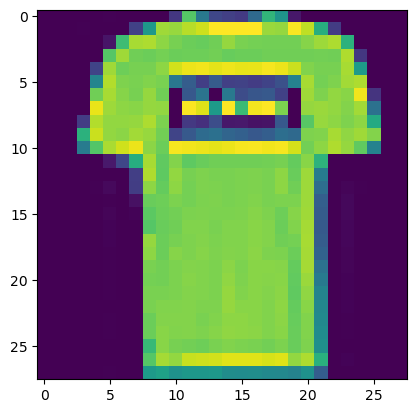

In [7]:
plt.imshow(image)
plt.show()

In [8]:
def pripare_dataset(path : str, dataset : str):
    data = []
    labler = []
    label = os.listdir(os.path.join(path, dataset))
    for labels in label:
        for file in os.listdir(os.path.join(folder, dataset, labels)):
            image = cv2.imread(os.path.join(folder, dataset, labels,file), cv2.IMREAD_UNCHANGED)
            # normalizing the data because numpy is a bitch and don't let me convert list into numpy array
            # after the normalizing the maximum value will be 1 and the minimum will be -1 
            data.append((np.array(image).astype(np.float32) - (255/2))/(255/2))
            labler.append(labels)
    return data, np.array(labler).astype("uint8")

In [11]:
def create_dataset(path:str):
    X_train, y_train = pripare_dataset(path, "train")
    X_test, y_test = pripare_dataset(path, "test")
    return X_train, y_train, X_test, y_test

In [154]:
X_train, y_train, X_test, y_test = create_dataset(folder)

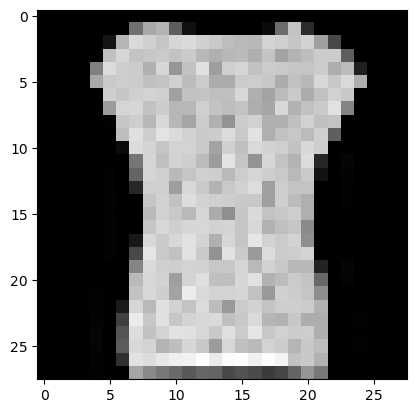

In [107]:
plt.imshow(X_train[5000], cmap = "gray")

In [219]:
def batch_shuffle(data, label, batch):
    try:
        data_split = np.array_split(data.copy(), batch)
        label_split = np.array_split(label.copy(), batch)
    except:
        data_split = [data[i:i + batch] for i in range(0, len(data), batch)]
        label_split = [label[i:i + batch] for i in range(0,len(label), batch)]
    dataset = list(zip(data_split, label_split))
    np.random.shuffle(dataset)
    return dataset

In [222]:
train_dataset = batch_shuffle(X_train, y_train, 32)
test_dataset = batch_shuffle(X_test, y_test, 32)

In [253]:
def images_labels(dataset):
    image = []
    label = []
    for img, lbl in dataset:
        for i , j in zip(img,lbl):
            image.append(np.array(i))
            label.append(j)
    return image, label

In [254]:
train_image, train_label = images_labels(train_dataset)
test_image, test_label = images_labels(test_dataset)

(4, <matplotlib.image.AxesImage at 0x1f1b9514250>)

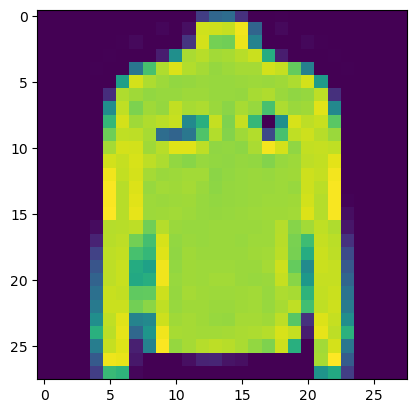

In [255]:
train_label[0], plt.imshow(train_image[0])

In [266]:
flatten_train_image = [i.flatten() for i in train_image]
flatten_test_image = [i.flatten() for i in test_image]
len(flatten_test_image[0])

784

In [ ]:
flatten_train_image = [flatten_train_image[i:i+32] for i in range(0, len(flatten_train_image), 32)] 
flatten_train_image[0]